# KICP Machine Learning Workshop 1: 
## Searching for Structure in Point Data

In this first tutorial/workshop, we will follow Chapter 6 of "Statistics, Data Mining, and Machine Learning in Astronomy". We will refer to it as "the text" or "textbook" hereafter. Each section number here refers to a section number in the book.

## Introduction
What is "Machine Learning"? According to the textbook: "Umbrella terms for a set of techniques for interpreting data by comparing them to models" (pg. 4).

### Some basics and terminology:
* Bayes rule:
    $$ p(x|y)p(y) = p(y|x)p(x)$$
    
* Bayesian inference:
From Bayes rule, one can trivially write down a statement connecting the probabilities of data and hypotheses:
    $$ p(H|D) = \frac{p(D|H)p(H)}{p(D)},$$
    * $p(H|D)$ is the _posterior probability_ which gives the probability of hypothesis $H$ given data $D$.  
    * $p(D|H)$ is called the _likelihood_ and describes the probability of the data $D$ given the hypothesis $H$.  It is often abreviated as $L(H)$.  
    * $p(H)$ is known as the _prior probability_ and represents the probability of a hypothesis before looking at the data.  
    * $p(D)$ is effectively a normalization parameter which tells one the probability of some data $D$, marginalized over all hypotheses.
    
* PDF: probability density function

### 3 Situations of Interest:
* Density Estimation: Estimate a PDF given some data
* Cluster Finding: Identifying groups in the data (eg. elliptical v. spiral galaxies)
* Statistics of structure in data

## 6.1: Nonparametric Density Estimation
"Nonparametric Density Estimation" refers to techniques for estimating PDFs without specifying a PDF functional form.  Assuming a PDF is Gaussian would be an example of parametric density estimation, whereas creating a histogram of data is an example of nonparametric density estimation 
### 6.1.1: Kernel Density Estimation
* Problem with histograms: They depend on the binning.  Bin sizes, locations, and shapes (in the case of >1D) all affect the PDF estimated with a histogram
* An estimate of the PDF for $N$ observations {$x_i$}: 
    * $ P(x) = \frac{1}{2Nh}\textrm{Number}(i;x_i \in (x-h,x+h]) $
    * Can be rewritten thusly:
    $$P(x) = \frac{1}{Nh} \sum_{i=1}^N w\left(\frac{x-x_i}{h}\right),$$ 
    where $w(x)$ is 1/2 if $|x|\leq 1$, else 0.


* _Modification_: change $w(x)$ to some general kernel K.  The kernel density estimator is now:
$$\hat{f}_N(x) = \frac{1}{Nh}\sum_{i=1}^N K\left(\frac{d(x,x_i)}{h}\right),$$
with the requirements $K(x)>0$, $\int_{-\infty}^{\infty} K(x) dx = 1$, and $K(x) = K(-x)$.


* *Example*: Gaussian Kernel

$$K(u) = \frac{1}{(2\pi)^{D/2}}e^{-u^2/2}$$

Let's take a look at some "data" and compare histograms with KDEs. First we'll plot some histograms and change bin sizes, etc to 

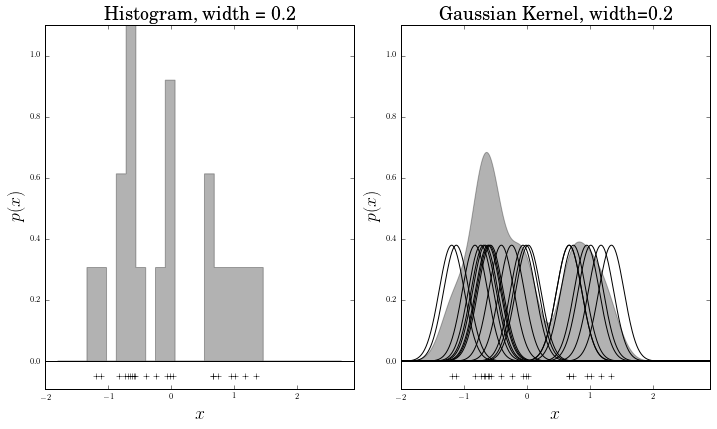

In [28]:
# Author: Jake VanderPlas
# Modifications by Zoheyr Doctor
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Draw the random data from a bimodal distribution comprised of two gaussians
np.random.seed(1)
x = np.concatenate([np.random.normal(-0.5, 0.3, size=14),
                    np.random.normal(1, 0.3, size=7)])


#------------------------------------------------------------
# First figure: silly histogram binning
fig1 = plt.figure(figsize=(10, 6))
fig1.subplots_adjust(left=0.12, right=0.95, wspace=0.05,
                     bottom=0.15, top=0.9, hspace=0.05)

FC = '#6666FF'
XLIM = (-2, 2.9)
YLIM = (-0.09, 1.1)

ax = fig1.add_subplot(121)

# Play with the number of bins and their locations and see how the data changes
numbins = 30
binmin = -1.8
binmax = 2.7
bins = np.linspace(binmin,binmax, numbins)

ax.hist(x, bins=bins, normed=True,
        histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$p(x)$',fontsize=18)
ax.set_title('Histogram, width = %1.1f' % np.diff(bins)[0],fontsize=18)

ax = fig1.add_subplot(122)
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
# select kernel width
kernel_width = 0.2
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], kernel_width)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, 4 * y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$',fontsize=18)
ax.set_xlabel('$x$',fontsize=18)
ax.set_title('Gaussian Kernel, width=%1.1f' % kernel_width,fontsize=18)
fig1.tight_layout()


_Exercise for next week_: Implement exponential and top hat KDEs

_Question_: How do we choose the bin width?

_Example Solution_: Maximize the cross validation likelihood.  eg. 
$$ CV_l(h) = \frac{1}{N}\sum_{i=1}^N {\rm log}\left(\hat{f}_{h,-i}(x_i)\right), $$
where $\hat{f}_{h,-i}(x_i)$ is the bin size $h$ PDF estimate at $x_i$, excluding $x_i$ from the "training" data.

Let's now look at an astro example where the bin width is optimized

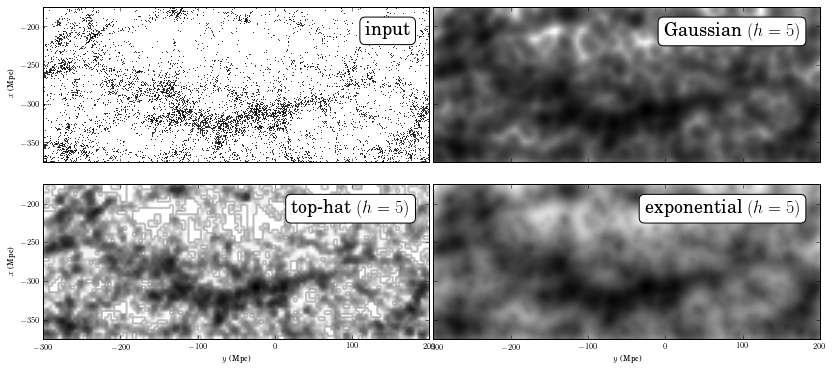

In [49]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from scipy.spatial import cKDTree
from scipy.stats import gaussian_kde

from astroML.datasets import fetch_great_wall

# Scikit-learn 0.14 added sklearn.neighbors.KernelDensity, which is a very
# fast kernel density estimator based on a KD Tree.  We'll use this if
# available (and raise a warning if it isn't).
try:
    from sklearn.neighbors import KernelDensity
    use_sklearn_KDE = True
except:
    import warnings
    warnings.warn("KDE will be removed in astroML version 0.3.  Please "
                  "upgrade to scikit-learn 0.14+ and use "
                  "sklearn.neighbors.KernelDensity.", DeprecationWarning)
    from astroML.density_estimation import KDE
    use_sklearn_KDE = False

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch the great wall data
X = fetch_great_wall()

#------------------------------------------------------------
# Create  the grid on which to evaluate the results
Nx = 50
Ny = 125
xmin, xmax = (-375, -175)
ymin, ymax = (-300, 200)

#------------------------------------------------------------
# Evaluate for several models
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

kernels = ['gaussian', 'tophat', 'exponential']
dens = []

if use_sklearn_KDE:
    kde1 = KernelDensity(5, kernel='gaussian')
    log_dens1 = kde1.fit(X).score_samples(Xgrid)
    dens1 = X.shape[0] * np.exp(log_dens1).reshape((Ny, Nx))

    kde2 = KernelDensity(5, kernel='tophat')
    log_dens2 = kde2.fit(X).score_samples(Xgrid)
    dens2 = X.shape[0] * np.exp(log_dens2).reshape((Ny, Nx))

    kde3 = KernelDensity(5, kernel='exponential')
    log_dens3 = kde3.fit(X).score_samples(Xgrid)
    dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))

else:
    kde1 = KDE(metric='gaussian', h=5)
    dens1 = kde1.fit(X).eval(Xgrid).reshape((Ny, Nx))

    kde2 = KDE(metric='tophat', h=5)
    dens2 = kde2.fit(X).eval(Xgrid).reshape((Ny, Nx))

    kde3 = KDE(metric='exponential', h=5)
    dens3 = kde3.fit(X).eval(Xgrid).reshape((Ny, Nx))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(13, 7))
fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                    hspace=0.01, wspace=0.01)

# First plot: scatter the points
ax1 = plt.subplot(221, aspect='equal')
ax1.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')
ax1.text(0.95, 0.9, "input", fontsize=18,ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Second plot: gaussian kernel
ax2 = plt.subplot(222, aspect='equal')
ax2.imshow(dens1.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax2.text(0.95, 0.9, "Gaussian $(h=5)$", fontsize=18, ha='right', va='top',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Third plot: top-hat kernel
ax3 = plt.subplot(223, aspect='equal')
ax3.imshow(dens2.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax3.text(0.95, 0.9, "top-hat $(h=5)$", fontsize=18, ha='right', va='top',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))
ax3.images[0].set_clim(0.01, 0.8)

# Fourth plot: exponential kernel
ax4 = plt.subplot(224, aspect='equal')
ax4.imshow(dens3.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax4.text(0.95, 0.9, "exponential $(h=5)$", fontsize=18, ha='right', va='top',
         transform=ax4.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(ymin, ymax - 0.01)
    ax.set_ylim(xmin, xmax)

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax3, ax4]:
    ax.set_xlabel('$y$ (Mpc)')

for ax in [ax2, ax4]:
    ax.yaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax1, ax3]:
    ax.set_ylabel('$x$ (Mpc)')


## 6.2 Nearest-Neighbor Density Estimation
_The basic idea_: 
* Choose some integer $k$.  
* At each point $x$, find the $k$-th nearest neighbor to $x$ in the existing dataset and evaluate the distance between them.
* Use the distance to get the 'volume', and use $k$ as the number in that volume. 

To be precise, the density estimator for KNN is 
$$\hat{f}_k(x) = \frac{k}{V_D(d_k(x))},$$
where $d_k(x)$ is the distance between $x$ and it's $k$-th nearest neighbor and $V(u)$ is the volume inside radius $u$ in $D$ dimensions.

Let's take a looks the same example as above, but using KNN.


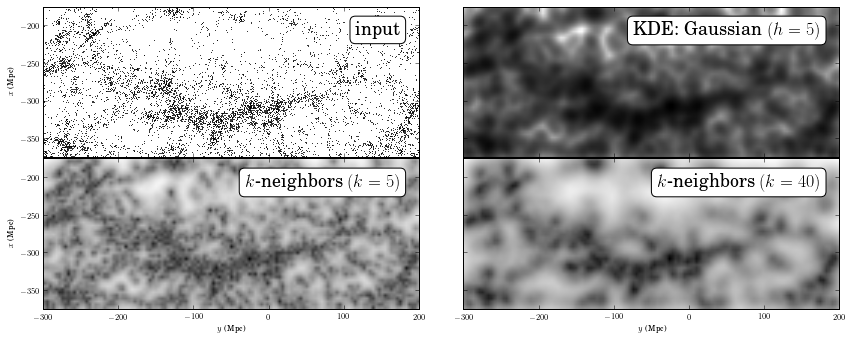

In [51]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from scipy.spatial import cKDTree

from astroML.datasets import fetch_great_wall
from astroML.density_estimation import KDE, KNeighborsDensity

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch the great wall data
X = fetch_great_wall()

#------------------------------------------------------------
# Create  the grid on which to evaluate the results
Nx = 50
Ny = 125
xmin, xmax = (-375, -175)
ymin, ymax = (-300, 200)

#------------------------------------------------------------
# Evaluate for several models
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

kde = KDE(metric='gaussian', h=5)
dens_KDE = kde.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn5 = KNeighborsDensity('bayesian', 5)
dens_k5 = knn5.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn40 = KNeighborsDensity('bayesian', 40)
dens_k40 = knn40.fit(X).eval(Xgrid).reshape((Ny, Nx))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(14, 6))
fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                    hspace=0.01, wspace=0.01)

# First plot: scatter the points
ax1 = plt.subplot(221, aspect='equal')
ax1.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')
ax1.text(0.95, 0.9, "input", fontsize=18, ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Second plot: KDE
ax2 = plt.subplot(222, aspect='equal')
ax2.imshow(dens_KDE.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax2.text(0.95, 0.9, "KDE: Gaussian $(h=5)$", fontsize=18, ha='right', va='top',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Third plot: KNN, k=5
ax3 = plt.subplot(223, aspect='equal')
ax3.imshow(dens_k5.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax3.text(0.95, 0.9, "$k$-neighbors $(k=5)$", fontsize=18, ha='right', va='top',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Fourth plot: KNN, k=40
ax4 = plt.subplot(224, aspect='equal')
ax4.imshow(dens_k40.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax4.text(0.95, 0.9, "$k$-neighbors $(k=40)$", fontsize=18, ha='right', va='top',
         transform=ax4.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(ymin, ymax - 0.01)
    ax.set_ylim(xmin, xmax)

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax3, ax4]:
    ax.set_xlabel('$y$ (Mpc)')

for ax in [ax2, ax4]:
    ax.yaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax1, ax3]:
    ax.set_ylabel('$x$ (Mpc)')


## 6.3 Parametric Density Estimation
### 6.3.1 Gaussian Mixture Model
* Model the underlying PDF as a sum of Gaussians
* The density of points is:
$$ \rho(x) = Np(x)=N\sum_{j=1}^M \alpha_j \mathcal{N}(\mu_j,\Sigma_j),$$
where $\mu_j$ are the Gaussian locations and $\Sigma_j$ are the covariance matrices.
* With PDF functional form in hand, can evaluate the likelihood of the data 
* _Question:_ how many Gaussians should be used to estimate the PDF?
    * Use some sort of "information criteria".  Let $L^0(M)$ be the maximum data likelihood, $N$ be the number of data points and $k$ be the number of parameters in model $M$.
        * Aikake information criterion (AIC):
            $$ {\rm AIC} = -2{\rm ln}(L^0(M)) + 2k+\frac{2k(k+1)}{N-k-1}$$
        * Bayesian informaiton criterion (BIC):
            $$ {\rm BIC} = -2{\rm ln}[L^0(M)]+k{\rm ln}N $$
            
Let's run our own GMM:

@pickle_results: using precomputed results from 'GMM_metallicity.pkl'
best fit converged: True
BIC: n_components =  7


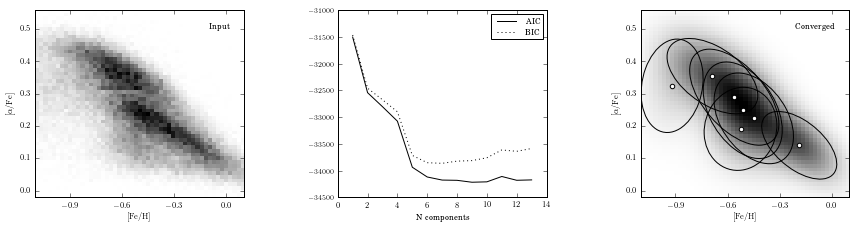

In [36]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

from sklearn.mixture import GMM

from astroML.datasets import fetch_sdss_sspp
from astroML.decorators import pickle_results
from astroML.plotting.tools import draw_ellipse

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Get the Segue Stellar Parameters Pipeline data
data = fetch_sdss_sspp(cleaned=True)
X = np.vstack([data['FeH'], data['alphFe']]).T

# truncate dataset for speed
X = X[::5]

#------------------------------------------------------------
# Compute GMM models & AIC/BIC
N = np.arange(1, 14)


@pickle_results("GMM_metallicity.pkl")
def compute_GMM(N, covariance_type='full', n_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        print N[i]
        models[i] = GMM(n_components=N[i], n_iter=n_iter,
                        covariance_type=covariance_type)
        models[i].fit(X)
    return models

models = compute_GMM(N)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

i_best = np.argmin(BIC)
gmm_best = models[i_best]
print "best fit converged:", gmm_best.converged_
print "BIC: n_components =  %i" % N[i_best]

#------------------------------------------------------------
# compute 2D density
FeH_bins = 51
alphFe_bins = 51
H, FeH_bins, alphFe_bins = np.histogram2d(data['FeH'], data['alphFe'],
                                          (FeH_bins, alphFe_bins))

Xgrid = np.array(map(np.ravel,
                     np.meshgrid(0.5 * (FeH_bins[:-1]
                                        + FeH_bins[1:]),
                                 0.5 * (alphFe_bins[:-1]
                                        + alphFe_bins[1:])))).T
log_dens = gmm_best.score(Xgrid).reshape((51, 51))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(13, 4.00))
fig.subplots_adjust(wspace=0.45,
                    bottom=0.25, top=0.9,
                    left=0.1, right=0.97)

# plot density
ax = fig.add_subplot(131)
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[FeH_bins[0], FeH_bins[-1],
                  alphFe_bins[0], alphFe_bins[-1]],
          cmap=plt.cm.binary)
ax.set_xlabel(r'$\rm [Fe/H]$')
ax.set_ylabel(r'$\rm [\alpha/Fe]$')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.3))
ax.set_xlim(-1.101, 0.101)
ax.text(0.93, 0.93, "Input",
        va='top', ha='right', transform=ax.transAxes)

# plot AIC/BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, ':k', label='BIC')
ax.legend(loc=1)
ax.set_xlabel('N components')
plt.setp(ax.get_yticklabels(), fontsize=7)

# plot best configurations for AIC and BIC
ax = fig.add_subplot(133)
ax.imshow(np.exp(log_dens),
          origin='lower', interpolation='nearest', aspect='auto',
          extent=[FeH_bins[0], FeH_bins[-1],
                  alphFe_bins[0], alphFe_bins[-1]],
          cmap=plt.cm.binary)

ax.scatter(gmm_best.means_[:, 0], gmm_best.means_[:, 1], c='w')
for mu, C, w in zip(gmm_best.means_, gmm_best.covars_, gmm_best.weights_):
    draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', ec='k')

ax.text(0.93, 0.93, "Converged",
        va='top', ha='right', transform=ax.transAxes)

ax.set_xlim(-1.101, 0.101)
ax.set_ylim(alphFe_bins[0], alphFe_bins[-1])
ax.xaxis.set_major_locator(plt.MultipleLocator(0.3))
ax.set_xlabel(r'$\rm [Fe/H]$')
ax.set_ylabel(r'$\rm [\alpha/Fe]$')


A GMM can also be done with noisy observations using an expectation maximization algorithm (See 6.3.3)

## 6.4 Finding Clusters in Data
### 6.4.2 Clustering by Sum-of-Squares Minimization: $K$-Means
* We want to find $K$ disjoint subsets of the data $C_K$ which minimize the sum of squares of the difference between each point $x_i$ in $C_K$ and the average $\mu_k$ of all points in $C_K$.  In math language, the objective function we want to minimize is:
$$ \text{Objective Function} = \sum_{k=1}^K \sum_{i \in C_K} ||x_i - \mu_k||^2 $$
* _The algorithm:_
    1. Choose random positions $\mu_k$ for centers of K clusters.
    2. Assign each data point to the cluster it is closest to.
    3. Recompute $\mu_k$
    4. Repeat from step 2

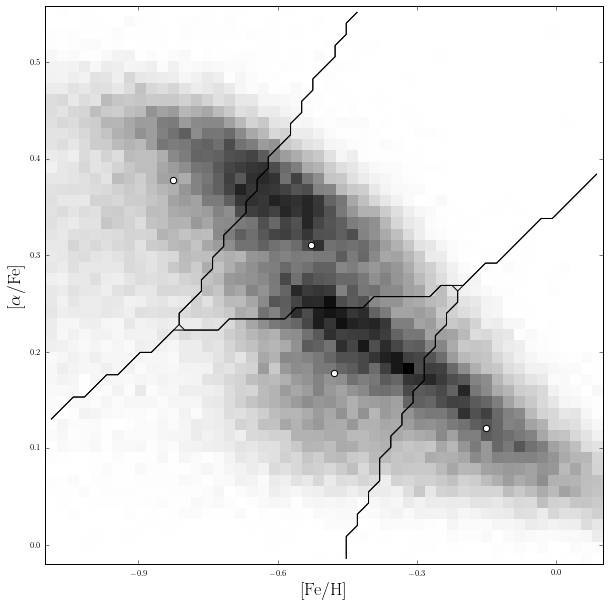

In [52]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm

from sklearn.cluster import KMeans
from sklearn import preprocessing
from astroML.datasets import fetch_sdss_sspp

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Get data
data = fetch_sdss_sspp(cleaned=True)
X = np.vstack([data['FeH'], data['alphFe']]).T

# truncate dataset for speed
X = X[::5]

#------------------------------------------------------------
# Compute a 2D histogram  of the input
H, FeH_bins, alphFe_bins = np.histogram2d(data['FeH'], data['alphFe'], 50)

#------------------------------------------------------------
# Compute the KMeans clustering
n_clusters = 4

scaler = preprocessing.StandardScaler() # ZD changed this from Scaler to StandardScaler
clf = KMeans(n_clusters)
clf.fit(scaler.fit_transform(X))

#------------------------------------------------------------
# Visualize the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

# plot density
ax = plt.axes()
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[FeH_bins[0], FeH_bins[-1],
                  alphFe_bins[0], alphFe_bins[-1]],
          cmap=plt.cm.binary)

# plot cluster centers
cluster_centers = scaler.inverse_transform(clf.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
FeH_centers = 0.5 * (FeH_bins[1:] + FeH_bins[:-1])
alphFe_centers = 0.5 * (alphFe_bins[1:] + alphFe_bins[:-1])

Xgrid = np.meshgrid(FeH_centers, alphFe_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

H = clf.predict(scaler.transform(Xgrid)).reshape((50, 50))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(FeH_centers, alphFe_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')

ax.xaxis.set_major_locator(plt.MultipleLocator(0.3))
ax.set_xlim(-1.101, 0.101)
ax.set_ylim(alphFe_bins[0], alphFe_bins[-1])

ax.set_xlabel(r'$\rm [Fe/H]$', fontsize=18)
ax.set_ylabel(r'$\rm [\alpha/Fe]$', fontsize=18)


### 6.4.3 Clustering by Max-Radius Minimization: The Gonzalez Algorithm

Rather than minimizing the sum of squared errors, minimize the max radius of a cluster:
$$ \text{Objective Function} =\max_{x_i\in C_k} ||x_i - \mu_k|| $$
* _The Gonzalez Algorithm_:
    1. starting w/ no clusters, add one cluster with a random cluster center.
    2. Find $x_i$ that maximizes distance from the cluster center
    3. Set that $x_i$ as a new cluster center.
    4. Repeat

### 6.4.4 Clustering by Nonparametric Density Estimation: Mean Shift
* _The basic idea_: "move the data points in the direction of the log of the gradient of the density of the data, until they finally converge to each other at the peaks of the bumps"
* _the algorithm_:
    1. Compute KDE $\hat{f}^m$ for $m$-th iteration with data $\{x_i^m\}$  
    2. Update data points:
    $$ x_i^{m+1} = x_i^m+a\nabla \log \hat{f}^m(x_i^m) $$
    3. Repeat
* If Epanechnikov kernel $\left(K(x) = \frac{3}{4}(1-x^2)\right)$ is used and one sets $a = h^2/(D+2)$, the update rule is just:
$$ x_i^{m+1} = \text{mean position of points }x_i^m \text{ within distance } h \text{ of } x_i^m,$$
which is known as the _mean-shift algorithm_.

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:184: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


[-1  0  1]
0.4
number of estimated clusters : 2


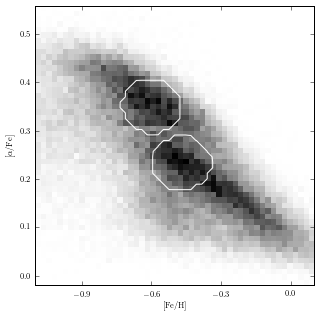

In [46]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing

from astroML.datasets import fetch_sdss_sspp

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Get the data
np.random.seed(0)
data = fetch_sdss_sspp(cleaned=True)

# cut out some additional strange outliers
data = data[~((data['alphFe'] > 0.4) & (data['FeH'] > -0.3))]

X = np.vstack([data['FeH'], data['alphFe']]).T

#----------------------------------------------------------------------
# Compute clustering with MeanShift
#
# We'll work with the scaled data, because MeanShift finds circular clusters

X_scaled = preprocessing.scale(X)

# The following bandwidth can be automatically detected using
# the routine estimate_bandwidth().  Because bandwidth estimation
# is very expensive in memory and computation, we'll skip it here.

#bandwidth = estimate_bandwidth(X)
bandwidth = 0.4

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X_scaled)

labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique >= 0])
print labels_unique
print bandwidth
print "number of estimated clusters : %d" % n_clusters

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# plot density
H, FeH_bins, alphFe_bins = np.histogram2d(data['FeH'], data['alphFe'], 51)

ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[FeH_bins[0], FeH_bins[-1],
                  alphFe_bins[0], alphFe_bins[-1]],
          cmap=plt.cm.binary)

# plot clusters
colors = ['b', 'g', 'r', 'k']

for i in range(n_clusters):
    Xi = X[ms.labels_ == i]
    H, b1, b2 = np.histogram2d(Xi[:, 0], Xi[:, 1], (FeH_bins, alphFe_bins))

    bins = [0.1]

    ax.contour(0.5 * (FeH_bins[1:] + FeH_bins[:-1]),
               0.5 * (alphFe_bins[1:] + alphFe_bins[:-1]),
               H.T, bins, colors='w')

ax.xaxis.set_major_locator(plt.MultipleLocator(0.3))
ax.set_xlim(-1.101, 0.101)
ax.set_ylim(alphFe_bins[0], alphFe_bins[-1])
ax.set_xlabel(r'$\rm [Fe/H]$')
ax.set_ylabel(r'$\rm [\alpha/Fe]$')

### 6.4.5 Clustering Procedurally: Hierarchical Clustering
* Don't need to specify number of clusters.
* _The algorithm_:
    1. Start with each data point having its own cluster (ie. N clusters for N data points) at its location.  
    2. Join two of the clusters based on some distance function between the clusters
    3. Repeat step (2).
* See Section 6.4.5 for possible distance functions
* At each step, links between data points are added to combine them to the same cluster.  
* To find individual clusters, sort all the link edge lengths and remove those above some threshold length.  

Let's take a look at an example:

 scale: 3.5495 Mpc


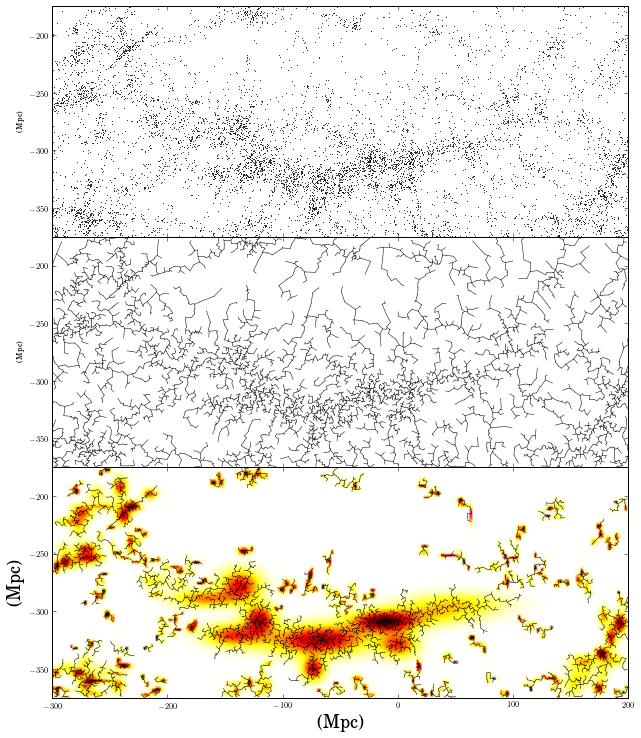

In [53]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from scipy import sparse
from sklearn.mixture import GMM

from astroML.clustering import HierarchicalClustering, get_graph_segments
from astroML.datasets import fetch_great_wall

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# get data
X = fetch_great_wall()

xmin, xmax = (-375, -175)
ymin, ymax = (-300, 200)

#------------------------------------------------------------
# Compute the MST clustering model
n_neighbors = 10
edge_cutoff = 0.9
cluster_cutoff = 10
model = HierarchicalClustering(n_neighbors=10,
                               edge_cutoff=edge_cutoff,
                               min_cluster_size=cluster_cutoff)
model.fit(X)
print " scale: %2g Mpc" % np.percentile(model.full_tree_.data,
                                        100 * edge_cutoff)

n_components = model.n_components_
labels = model.labels_

#------------------------------------------------------------
# Get the x, y coordinates of the beginning and end of each line segment
T_x, T_y = get_graph_segments(model.X_train_,
                              model.full_tree_)
T_trunc_x, T_trunc_y = get_graph_segments(model.X_train_,
                                          model.cluster_graph_)

#------------------------------------------------------------
# Fit a GMM to each individual cluster
Nx = 100
Ny = 250
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T
density = np.zeros(Xgrid.shape[0])

for i in range(n_components):
    ind = (labels == i)
    Npts = ind.sum()
    Nclusters = min(12, Npts / 5)

    gmm = GMM(Nclusters).fit(X[ind])
    dens = np.exp(gmm.score(Xgrid))
    density += dens / dens.max()

density = density.reshape((Ny, Nx))

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 12))
fig.subplots_adjust(hspace=0, left=0.1, right=0.95, bottom=0.1, top=0.9)

ax = fig.add_subplot(311, aspect='equal')
ax.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('(Mpc)')

ax = fig.add_subplot(312, aspect='equal')
ax.plot(T_y, T_x, c='k', lw=0.5)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('(Mpc)')

ax = fig.add_subplot(313, aspect='equal')
ax.plot(T_trunc_y, T_trunc_x, c='k', lw=0.5)
ax.imshow(density.T, origin='lower', cmap=plt.cm.hot_r,
          extent=[ymin, ymax, xmin, xmax])

ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
ax.set_xlabel('(Mpc)', fontsize=18)
ax.set_ylabel('(Mpc)', fontsize=18)

## 6.5 Correlation Functions
Consider small volumes of space $dV_1, dV_2$ with equal density $\rho$.  If the two volumes are purely independent, the probability $dP_{12}$ of finding a point in $dV_1$ and another point in $dV_2$ is 
$$ dP_{12} = \rho^2 dV_1 dV_2. $$
If we assume instead that the two volumes are not independent, then we must correct the above expression.  We can correct it to first order by considering a function $\xi(r)$, where $r$ is the distance between the two volume elements:
$$ dP_{12} = \rho^2 dV_1 dV_2 (1+\xi(r)). $$
$\xi(r)$ is the _two-point correlation function_. Another familiar way to write it is:
$$ \xi(r) = \left< \frac{\delta \rho(x)}{\rho} \frac{\delta \rho(x+r)}{\rho} \right>$$

data size:
  red gals:  38017
  blue gals: 16883
@pickle_results: using precomputed results from 'correlation_functions.pkl'


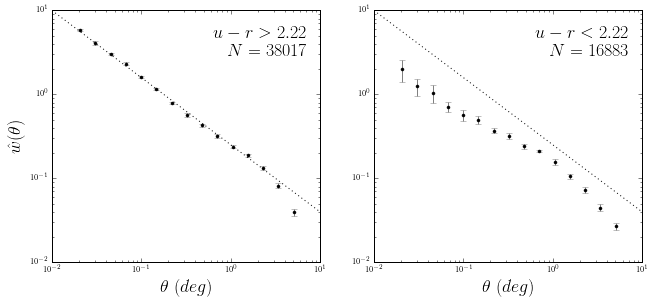

In [55]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.decorators import pickle_results
from astroML.datasets import fetch_sdss_specgals
from astroML.correlation import bootstrap_two_point_angular

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Get data and do some quality cuts
data = fetch_sdss_specgals()
m_max = 17.7

# redshift and magnitude cuts
data = data[data['z'] > 0.08]
data = data[data['z'] < 0.12]
data = data[data['petroMag_r'] < m_max]

# RA/DEC cuts
RAmin, RAmax = 140, 220
DECmin, DECmax = 5, 45
data = data[data['ra'] < RAmax]
data = data[data['ra'] > RAmin]
data = data[data['dec'] < DECmax]
data = data[data['dec'] > DECmin]

ur = data['modelMag_u'] - data['modelMag_r']
flag_red = (ur > 2.22)
flag_blue = ~flag_red

data_red = data[flag_red]
data_blue = data[flag_blue]

print "data size:"
print "  red gals: ", len(data_red)
print "  blue gals:", len(data_blue)


#------------------------------------------------------------
# Set up correlation function computation
#  This calculation takes a long time with the bootstrap resampling,
#  so we'll save the results.
@pickle_results("correlation_functions.pkl")
def compute_results(Nbins=16, Nbootstraps=10,  method='landy-szalay', rseed=0):
    np.random.seed(rseed)
    bins = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)

    results = [bins]
    for D in [data_red, data_blue]:
        results += bootstrap_two_point_angular(D['ra'],
                                               D['dec'],
                                               bins=bins,
                                               method=method,
                                               Nbootstraps=Nbootstraps)

    return results

(bins, r_corr, r_corr_err, r_bootstraps,
 b_corr, b_corr_err, b_bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
# Plot the results
corr = [r_corr, b_corr]
corr_err = [r_corr_err, b_corr_err]
bootstraps = [r_bootstraps, b_bootstraps]
labels = ['$u-r > 2.22$\n$N=%i$' % len(data_red),
          '$u-r < 2.22$\n$N=%i$' % len(data_blue)]

fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

for i in range(2):
    ax = fig.add_subplot(121 + i, xscale='log', yscale='log')

    ax.errorbar(bin_centers, corr[i], corr_err[i],
                fmt='.k', ecolor='gray', lw=1)

    t = np.array([0.01, 10])
    ax.plot(t, 10 * (t / 0.01) ** -0.8, ':k', linewidth=1)

    ax.text(0.95, 0.95, labels[i], fontsize=18,
            ha='right', va='top', transform=ax.transAxes)
    ax.set_xlabel(r'$\theta\ (deg)$', fontsize=18)
    if i == 0:
        ax.set_ylabel(r'$\hat{w}(\theta)$', fontsize=18)
